In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [327]:
#Question 1: Created a pivot table showing the mean ratings for each genre

import pandas as pd
data = pd.read_csv('C:/Users/samgh/Downloads/movie_lens_genre_separated/movie_lens_genre_separated.tsv', sep='\t')
mean_ratings = data.pivot_table('rating', index = 'genres', aggfunc = 'mean')
mean_ratings

,rating
genres,
Action,3.491185
Adventure,3.477257
Animation,3.684895
Children's,3.422087
Comedy,3.522107
Crime,3.708679
Documentary,3.933123
Drama,3.766332
Fantasy,3.447371


In [328]:
#Question 2: First, I created a dataframe that showed in descending order the ratings for each genre by each occupation 
#group.Then, I grouped the dataframe by occupation and found the top 5 genres for each occupation, sorting the rating 
#values in descending order. 

avgrating_occup_genre = data.groupby(['occupation', 'genres'], as_index = False)['rating'].mean().sort_values('rating', ascending = False)
avgrating_occup_genre
topfive_occup_genre = avgrating_occup_genre.groupby(['occupation']).head(5).sort_values(['occupation', 'rating'], ascending=[True, False]).reset_index()
topfive_occup_genre.drop(['index'], axis = 1, inplace=True)
topfive_occup_genre

,occupation,genres,rating
0,0,Film-Noir,4.058155
1,0,Documentary,3.854545
2,0,War,3.852334
3,0,Drama,3.743350
4,0,Animation,3.674843
5,1,Film-Noir,4.082613
6,1,Documentary,3.984887
7,1,War,3.882950
8,1,Drama,3.754293
9,1,Musical,3.701586


In [329]:
data.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,2917,2355,2,971730180,M,25,0,60201,"Bug's Life, A (1998)",Animation
1,2917,2355,2,971730180,M,25,0,60201,"Bug's Life, A (1998)",Children's
2,2917,2355,2,971730180,M,25,0,60201,"Bug's Life, A (1998)",Comedy
3,2924,2355,4,971592069,F,18,4,94121,"Bug's Life, A (1998)",Animation
4,2924,2355,4,971592069,F,18,4,94121,"Bug's Life, A (1998)",Children's


In [340]:
#Question 3: Created a dataframe that shows for each age group, the number of ratings (count) of a particular movie

data_group = pd.DataFrame(data.groupby(['age', 'title']).size())
data_group['Count'] = data_group

In [341]:
#deleted first column of dataframe because it was unnecessary
del data_group[0]

In [342]:
#Question 3: Sorted the dataframe by age (in ascending order) and count(in descending order) and then took the first value
#from each age group, which would create a dataframe that showed for each age group the title with the most ratings and the 
#count for the number of ratings for that most popular movie. 
data_group = data_group.sort_values(['age', 'Count'], ascending = [True, False])
data_group.groupby('age').head(1)

,,Count
age,title,
1,Star Wars: Episode VI - Return of the Jedi (1983),500
18,Star Wars: Episode VI - Return of the Jedi (1983),2930
25,Star Wars: Episode V - The Empire Strikes Back (1980),5880
35,Star Wars: Episode V - The Empire Strikes Back (1980),2990
45,Star Wars: Episode V - The Empire Strikes Back (1980),1130
50,Star Wars: Episode V - The Empire Strikes Back (1980),1030
56,Star Wars: Episode V - The Empire Strikes Back (1980),565


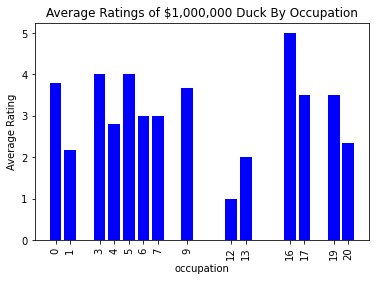

In [343]:
#Question 4: Created a bar graph that shows the average rating for the movie 1,000,000 Duck by occupation group

import numpy as np
import matplotlib.pyplot as plt
df_duck_movie = data[data['title'] == '$1,000,000 Duck (1971)']
df_duck_movie
df_duck_movie_avg_ratings = df_duck_movie.groupby(['occupation'], as_index=False)['rating'].mean()
df_duck_movie_avg_ratings
%matplotlib inline
x = np.array(df_duck_movie_avg_ratings.iloc[:, 0])
y = np.array(df_duck_movie_avg_ratings.iloc[:, 1])
plt.bar(x, y, color = 'blue')
plt.xticks(x, rotation = 'vertical')
plt.title("Average Ratings of $1,000,000 Duck By Occupation")
plt.xlabel("occupation")
plt.ylabel("Average Rating")
plt.show()

In [344]:
#Question 5: This function will take in a user_id and check if it exists in the dataframe. If it does exist, I create a 
#new condensed dataframe that grabs only the information in the columns at index 0, 2, 5, 6, 8
#(user_id, rating, age, occupation, title). I then use this dataframe to answer questions about their age, occupation
#and average rating. To find their highest and lowest rated movies, I find the min and max rating values in the dataframe
#and then create new dataframes that show only the movies with the min and max ratings. Then, I print out a list of the
#titles in those dataframes. Lastly, if the user_id does not exist, then the function just prints out a statement saying
#the user_id could not be found in the dataset. 

def getUserInfo(user_id):
    if user_id in data['user_id']:
        user_info = data[(data['user_id'] == user_id)]
        user_info_condensed = user_info.iloc[:, [0, 2, 5, 6, 8]]
        sort_df = user_info_condensed.sort_values(['rating'], ascending=True)
        print("Information for user_id " + str(user_id) + ":")
        print("Age: ", user_info_condensed['age'].head(1).values)
        print("Occupation: ", user_info_condensed['occupation'].head(1).values)
        print("Average rating: ", user_info_condensed['rating'].mean())
        max_column = sort_df['rating']
        max_value = max_column.max()
        min_column = sort_df['rating']
        min_value = min_column.min()
        sort_df_max = sort_df[(sort_df['rating'] == max_value)]
        sort_df_min = sort_df[(sort_df['rating'] == min_value)]
        print()
        print("Highest Rated Movies: ")
        print(list(np.unique(sort_df_max.iloc[:, [4]].values)))
        print()
        print("Lowest Rated Movies: ")
        print(list(np.unique(sort_df_min.iloc[:, [4]].values)))
    else:
        print()
        print("Information for user_id " + str(user_id) + ":")
        print("The user_id taken in this function does not exist in the dataset")
        
getUserInfo(2917)
getUserInfo(111111111111111111111111111)

Information for user_id 2917:
Age:  [25]
Occupation:  [0]
Average rating:  3.423611111111111

Highest Rated Movies: 
['Annie Hall (1977)', 'Blade Runner (1982)', 'Citizen Kane (1941)', 'City Lights (1931)', 'Crumb (1994)', 'Fandango (1985)', 'Fargo (1996)', 'Hard-Boiled (Lashou shentan) (1992)', 'Killer, The (Die xue shuang xiong) (1989)', 'North by Northwest (1959)', 'Paradise Lost: The Child Murders at Robin Hood Hills (1996)', 'Pulp Fiction (1994)', 'Raging Bull (1980)', 'Raiders of the Lost Ark (1981)', 'Rear Window (1954)', 'Strangers on a Train (1951)', 'Vertigo (1958)']

Lowest Rated Movies: 
['Arachnophobia (1990)', 'Entrapment (1999)']

Information for user_id 111111111111111111111111111:
The user_id taken in this function does not exist in the dataset


<AxesSubplot:title={'center':'rating'}, xlabel='genres'>

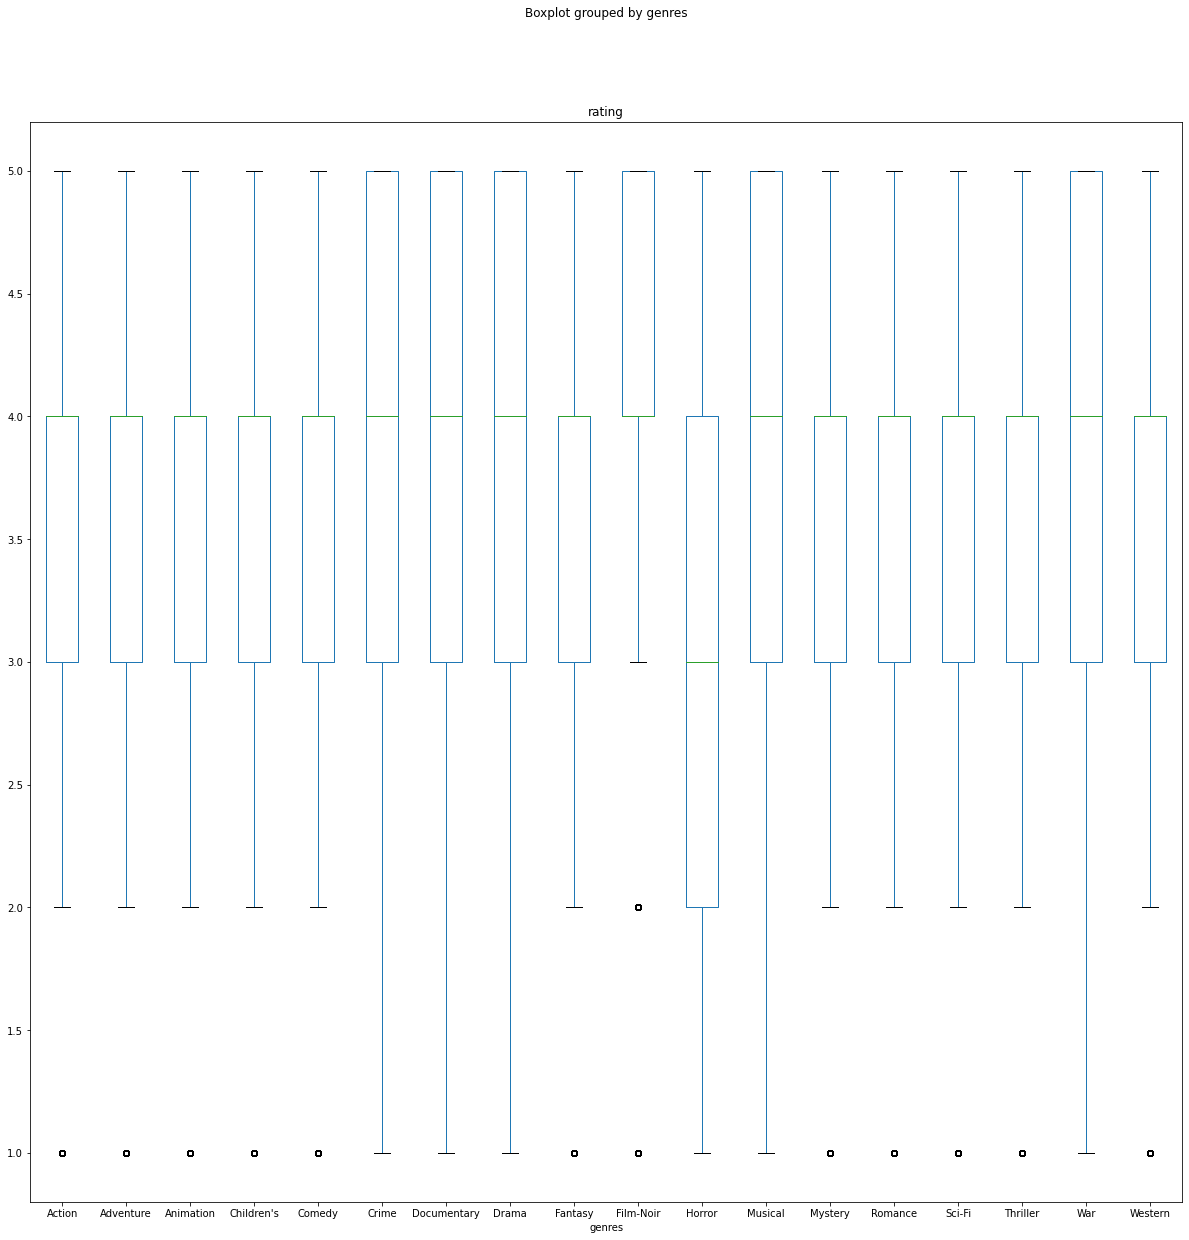

In [345]:
#Question 6: I created a boxplot that shows the distribution of ratings for each genre. 
#Observations:
#-The minimum rating for most movie genres (excluding outliers) is 2 except for crime, documentary, drama, horror, musical, 
# and war which have minimum ratings of 1, which indicates these genres have a wider distribution of ratings
#-Film-Noir genre's minimum rating (excluding outliers) is 3, which is higher than the rest of the genres
#-The median rating for most genres is approximately 4, except for horror which has a median of 3
#-The 25th percentile rating is about 3 for most of the genres
#-Outlier values tend to be on the lower end of the scale (around 1 for all of them, except Film-Noir which is about 2) 
#rather than the higher end, which indicates that people are less likely to give super negative ratings towards movies 
#regardless of genre


data.boxplot(by='genres', column=['rating'], figsize = (20, 20), grid=False)